In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import os
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Make a reference to the shooting_incident_dat.csv file path
csv_path = Path('Resources/shooting_incident_data.csv')

In [3]:
# Import the csv file as a DataFrame
ny_crime_df = pd.read_csv('Resources/shooting_incident_data.csv')
ny_crime_df.head()

,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,location_desc,statistical_murder_flag,perp_age_group,perp_sex,...,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,loc_classfctn_desc,loc_of_occur_desc
0,216351812,2020-08-07T00:00:00.000,14:40:00,BRONX,48,0.0,NaN,False,18-24,M,...,25-44,M,BLACK HISPANIC,1013656.750,251677.296875,40.857430,-73.893696,POINT (-73.89369634299999 40.857430143000045),NaN,NaN
1,11118232,2006-04-26T00:00:00.000,18:26:00,QUEENS,105,0.0,PVT HOUSE,True,45-64,M,...,25-44,M,BLACK,1055658.875,201767.437500,40.720202,-73.742390,POINT (-73.74239028299996 40.72020175200004),NaN,NaN
2,26543083,2007-01-28T00:00:00.000,06:00:00,BROOKLYN,63,0.0,RESTAURANT/DINER,True,NaN,NaN,...,25-44,M,BLACK,1005491.625,170817.250000,40.635513,-73.923469,POINT (-73.92346854399995 40.63551320600004),NaN,NaN
3,228798150,2021-05-27T00:00:00.000,21:06:00,BRONX,43,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,25-44,M,BLACK,1026600.000,238546.000000,40.821336,-73.846990,POINT (-73.84698961699996 40.821336002000066),NaN,NaN
4,93607540,2013-11-15T00:00:00.000,22:37:00,BRONX,47,0.0,NaN,False,NaN,NaN,...,18-24,M,BLACK,1027500.375,260415.968750,40.881358,-73.843595,POINT (-73.84359545999996 40.88135813300005),NaN,NaN


In [4]:
# Captilize the columns using list comprehension
ny_crime_df.columns = [column_name.upper() for column_name in ny_crime_df.columns.tolist()]
ny_crime_df.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,LATITUDE,LONGITUDE,GEOCODED_COLUMN,LOC_CLASSFCTN_DESC,LOC_OF_OCCUR_DESC
27307,243767115,2022-04-16T00:00:00.000,22:15:00,QUEENS,109,0.0,MULTI DWELL - APT BUILD,False,25-44,M,...,25-44,M,ASIAN / PACIFIC ISLANDER,1030410.0,217889.0,40.764613,-73.833362,POINT (-73.833362 40.764613),NaN,NaN
27308,242393701,2022-03-20T00:00:00.000,02:50:00,BRONX,40,2.0,MULTI DWELL - PUBLIC HOUS,False,(null),(null),...,18-24,M,WHITE HISPANIC,1006807.0,238604.0,40.821562,-73.918498,POINT (-73.918498 40.821562),NaN,NaN
27309,244279288,2022-04-27T00:00:00.000,15:20:00,BROOKLYN,75,0.0,(null),False,<18,M,...,18-24,M,BLACK HISPANIC,1018053.0,189125.0,40.685718,-73.878116,POINT (-73.878116 40.685718),NaN,NaN
27310,250752756,2022-09-07T00:00:00.000,19:05:00,BROOKLYN,75,0.0,(null),True,18-24,M,...,25-44,M,BLACK,1017276.0,184413.0,40.672789,-73.880940,POINT (-73.88094 40.672789),NaN,NaN
27311,250044143,2022-08-23T00:00:00.000,16:19:00,BRONX,48,0.0,(null),False,18-24,M,...,65+,F,BLACK,1016031.0,249136.0,40.850440,-73.885123,POINT (-73.885123 40.85044),NaN,NaN


In [5]:
## Get the datatype with column names.
ny_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   PRECINCT                 27312 non-null  int64  
 5   JURISDICTION_CODE        27310 non-null  float64
 6   LOCATION_DESC            12335 non-null  object 
 7   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 8   PERP_AGE_GROUP           17968 non-null  object 
 9   PERP_SEX                 18002 non-null  object 
 10  PERP_RACE                18002 non-null  object 
 11  VIC_AGE_GROUP            27312 non-null  object 
 12  VIC_SEX                  27312 non-null  object 
 13  VIC_RACE                 27312 non-null  object 
 14  X_COORD_CD            

In [6]:
# Convert OCCUR_DATE to the appropriate format
ny_crime_df['OCCUR_DATE'] = pd.to_datetime(ny_crime_df['OCCUR_DATE'])

In [7]:
# Replace and fill na values with UNKNOWN
ny_crime_df['PERP_AGE_GROUP'] = ny_crime_df['PERP_AGE_GROUP'].replace('(null)', 'UNKNOWN')
ny_crime_df['PERP_AGE_GROUP'] = ny_crime_df['PERP_AGE_GROUP'].fillna('UNKNOWN')

# Replace '1020' to UNKNOWN for PERP_AGE_GROUP
ny_crime_df['PERP_AGE_GROUP'] = ny_crime_df['PERP_AGE_GROUP'].replace('1020', 'UNKNOWN')

In [8]:
# Replace and fill na values with UNKNOWN
ny_crime_df['PERP_SEX'] = ny_crime_df['PERP_SEX'].replace('(null)', 'U')
ny_crime_df['PERP_SEX'] = ny_crime_df['PERP_SEX'].fillna('U')

In [9]:
# Replace and fill na values with UNKNOWN
ny_crime_df['PERP_RACE'] = ny_crime_df['PERP_RACE'].replace('(null)', 'UNKNOWN')
ny_crime_df['PERP_RACE'] = ny_crime_df['PERP_RACE'].fillna('UNKNOWN')

In [10]:
# Replace '1022' to UNKNOWN for VIC_AGE_GROUP
ny_crime_df['VIC_AGE_GROUP'] = ny_crime_df['VIC_AGE_GROUP'].replace('1022', 'UNKNOWN')

In [11]:
# Drop rows with LATITUDE or LONGITUDE as null or invalid values
ny_crime_df = ny_crime_df.dropna(subset=['LONGITUDE'])

In [12]:
# Drop columns not needed filled with a lot of NA
ny_crime_df = ny_crime_df.drop(columns=['JURISDICTION_CODE', 'LOCATION_DESC', 'LOC_CLASSFCTN_DESC', 'LOC_OF_OCCUR_DESC', 'GEOCODED_COLUMN'])
ny_crime_df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,LATITUDE,LONGITUDE
0,216351812,2020-08-07,14:40:00,BRONX,48,False,18-24,M,BLACK,25-44,M,BLACK HISPANIC,1013656.750,251677.296875,40.857430,-73.893696
1,11118232,2006-04-26,18:26:00,QUEENS,105,True,45-64,M,BLACK,25-44,M,BLACK,1055658.875,201767.437500,40.720202,-73.742390
2,26543083,2007-01-28,06:00:00,BROOKLYN,63,True,UNKNOWN,U,UNKNOWN,25-44,M,BLACK,1005491.625,170817.250000,40.635513,-73.923469
3,228798150,2021-05-27,21:06:00,BRONX,43,False,UNKNOWN,U,UNKNOWN,25-44,M,BLACK,1026600.000,238546.000000,40.821336,-73.846990
4,93607540,2013-11-15,22:37:00,BRONX,47,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,1027500.375,260415.968750,40.881358,-73.843595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,243767115,2022-04-16,22:15:00,QUEENS,109,False,25-44,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,1030410.000,217889.000000,40.764613,-73.833362
27308,242393701,2022-03-20,02:50:00,BRONX,40,False,UNKNOWN,U,UNKNOWN,18-24,M,WHITE HISPANIC,1006807.000,238604.000000,40.821562,-73.918498
27309,244279288,2022-04-27,15:20:00,BROOKLYN,75,False,<18,M,BLACK,18-24,M,BLACK HISPANIC,1018053.000,189125.000000,40.685718,-73.878116
27310,250752756,2022-09-07,19:05:00,BROOKLYN,75,True,18-24,M,BLACK,25-44,M,BLACK,1017276.000,184413.000000,40.672789,-73.880940


In [13]:
ny_crime_df.to_csv("Resources/NYC Shooting Incidents - Clean.csv", index=False)

In [16]:
import geopandas as gpd
from shapely.geometry import Point

def make_geo_point(row):
    return Point(row['LONGITUDE'], row['LATITUDE'])

ny_crime_df['GEOCODE_POINT'] = ny_crime_df.apply(make_geo_point, axis=1)

gdf = gpd.GeoDataFrame(ny_crime_df, geometry='GEOCODE_POINT')

In [17]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 27302 entries, 0 to 27311
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             27302 non-null  int64         
 1   OCCUR_DATE               27302 non-null  datetime64[ns]
 2   OCCUR_TIME               27302 non-null  object        
 3   BORO                     27302 non-null  object        
 4   PRECINCT                 27302 non-null  int64         
 5   STATISTICAL_MURDER_FLAG  27302 non-null  bool          
 6   PERP_AGE_GROUP           27302 non-null  object        
 7   PERP_SEX                 27302 non-null  object        
 8   PERP_RACE                27302 non-null  object        
 9   VIC_AGE_GROUP            27302 non-null  object        
 10  VIC_SEX                  27302 non-null  object        
 11  VIC_RACE                 27302 non-null  object        
 12  X_COORD_CD               2730

In [22]:
# Convert datetime columns to string in ISO format
gdf['OCCUR_DATE'] = gdf['OCCUR_DATE'].dt.strftime('%Y-%m-%dT%H:%M:%S')

# Convert the GeoDataFrame to JSON
json_string = gdf.to_json()

In [24]:
with open('Resources/NYC Shooting Incidents - JSON.json', 'w') as f:
    f.write(json_string)

## Does race have a play in the rate of the shooting incidence in each borough?

In [49]:
# Create a DataFrame of the totals for each BORO by PERP_RACE.
grouped_race_boro = clean_df.groupby(["BORO", "PERP_RACE"])

total_boro = grouped_race_boro.sum('INCIDENT_KEY')
total_boro.head()

INCIDENT_KEY  PRECINCT  \
BORO  PERP_RACE                                                
BRONX (null)                           45299648846      8250   
      AMERICAN INDIAN/ALASKAN NATIVE      68609813        47   
      ASIAN / PACIFIC ISLANDER          1512056180       479   
      BLACK                           162861212978     61914   
      BLACK HISPANIC                   36969291223     12362   

                                      JURISDICTION_CODE  \
BORO  PERP_RACE                                           
BRONX (null)                                       48.0   
      AMERICAN INDIAN/ALASKAN NATIVE                0.0   
      ASIAN / PACIFIC ISLANDER                      4.0   
      BLACK                                       825.0   
      BLACK HISPANIC                              112.0   

                                      STATISTICAL_MURDER_FLAG    X_COORD_CD  \
BORO  PERP_RACE                                                               
BRONX (null)                                               16  1.856878e+08   
      AMERICAN INDIAN/ALASKAN NATIVE                        0  1.023883e+06   
      ASIAN / PACIFIC ISLANDER                              0  1.021317e+07   
      BLACK                                               381  1.404875e+09   
      BLACK HISPANIC                                       74  2.796172e+08   

                                        Y_COORD_CD      LATITUDE  \
BORO  PERP_RACE                                                    
BRONX (null)                          4.509648e+07   7474.271131   
      AMERICAN INDIAN/ALASKAN NATIVE  2.663964e+05     40.897790   
      ASIAN / PACIFIC ISLANDER        2.476340e+06    408.463002   
      BLACK                           3.422802e+08  56530.089624   
      BLACK HISPANIC                  6.791153e+07  11272.391960   

                                          LONGITUDE  
BORO  PERP_RACE                                      
BRONX (null)                          -13521.867718  
      AMERICAN INDIAN/ALASKAN NATIVE     -73.856643  
      ASIAN / PACIFIC ISLANDER          -738.660269  
      BLACK                          -102261.759142  
      BLACK HISPANIC                  -20395.215426

In [52]:
# #####Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = clean_df.groupby("BORO")
grouped_df.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = grouped_df["PRECINCT"].mean()
median = grouped_df["PRECINCT"].median()
variance = grouped_df["PRECINCT"].var()
str_dv = grouped_df["PRECINCT"].std()
str_err = grouped_df["PRECINCT"].sem()
str_err
# Assemble the resulting series into a single summary DataFrame.
summary_stat_df = pd.DataFrame({"Mean Shooting Incidents ": mean, 
                                "Median Shooting Incidents": median, 
                                "Shooting Incidents Variance": variance, 
                                "Shooting Incidents Std. Dev.": str_dv, 
                                "Shooting Incidents Std. Err.": str_err
})
summary_stat_df

,Mean Shooting Incidents,Median Shooting Incidents,Shooting Incidents Variance,Shooting Incidents Std. Dev.,Shooting Incidents Std. Err.
BORO,,,,,
BRONX,44.760376,44.0,11.661320,3.414867,0.067571
BROOKLYN,74.769389,75.0,57.209512,7.563697,0.129640
MANHATTAN,23.625641,25.0,76.854621,8.766677,0.237284
QUEENS,107.401061,106.0,27.381516,5.232735,0.144081
STATEN ISLAND,120.472313,120.0,0.785996,0.886564,0.050599


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stat = clean_df.groupby("BORO")["INCIDENT_KEY"].agg(mean="mean", median="median", var="var", std="std", sem="sem")
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat
#the propriva value is not matching and i can't fi

,mean,median,var,std,sem
BORO,,,,,
BRONX,1.239844e+08,85875439.0,7.205118e+15,8.488296e+07,1.679616e+06
BROOKLYN,1.110868e+08,78065526.0,6.767174e+15,8.226284e+07,1.409967e+06
MANHATTAN,1.299079e+08,90215685.0,7.425442e+15,8.617100e+07,2.332356e+06
QUEENS,1.242620e+08,84228144.0,6.944253e+15,8.333218e+07,2.294512e+06
STATEN ISLAND,1.147882e+08,82196649.0,6.095331e+15,7.807260e+07,4.455839e+06


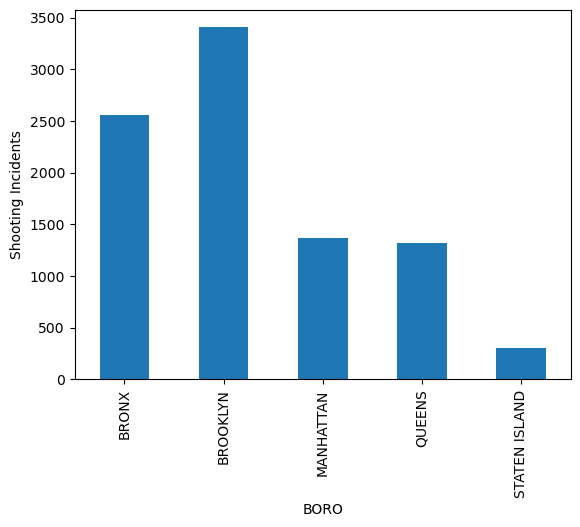

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_num_row = grouped_df["BORO"].count()
total_num_row

# Use DataFrame.plot() in order to create a bar chart of the data
total_num_row.plot(kind="bar", legend=False)
plt.ylabel("Shooting Incidents")
plt.show()

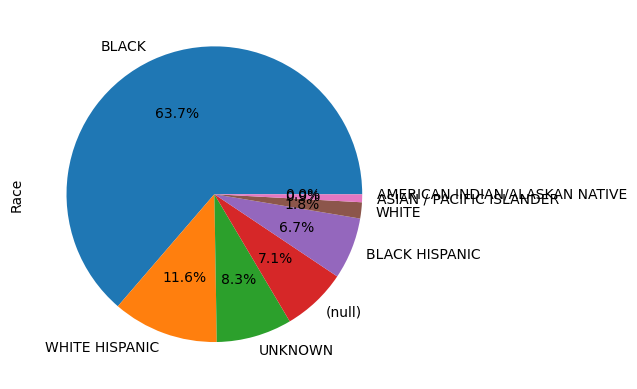

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

race_chart_df = clean_df["PERP_RACE"].value_counts()
race_chart_df 
race_chart_df.plot(kind="pie", explode= e=autopct="%.1f%%")
plt.ylabel("Race")
plt.show()


ValueError: 'label' must be of length 'x'

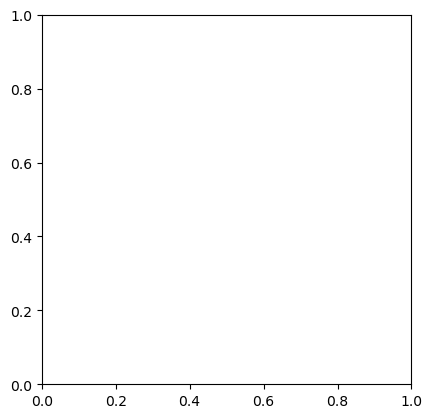

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0, 0)
plt.pie(race_chart_df, explode=explode, labels='PERP_RACE', colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()